In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
try:
    df = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('spam.csv', encoding='latin1')

In [11]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [16]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [17]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [21]:
train_data.shape

(4457, 2)

In [22]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

In [23]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['v2'].apply(clean_text)

In [24]:
train_data

,v1,v2,Text_cleaning
1978,ham,No I'm in the same boat. Still here at my moms...,boat still moms check half naked
3989,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,bank granite issues strong buy explosive pick ...
3935,ham,They r giving a second chance to rahul dengra.,giving second chance rahul dengra
4078,ham,O i played smash bros &lt;#&gt; religiously.,played smash bros religiously
4086,spam,PRIVATE! Your 2003 Account Statement for 07973...,private account statement shows redeemed point...
...,...,...,...
3772,ham,I came hostel. I m going to sleep. Plz call me...,came hostel going sleep plz call class hrishi
5191,ham,"Sorry, I'll call later",sorry ill call later
5226,ham,Prabha..i'm soryda..realy..frm heart i'm sory,prabha soryda realy frm heart sory
5390,ham,Nt joking seriously i told,joking seriously told


In [25]:
train_data['v1'] = train_data['v1'].map({'ham': 0, 'spam': 1})

In [27]:
train_data.drop('v2',axis=1)

,v1,Text_cleaning
1978,0,boat still moms check half naked
3989,1,bank granite issues strong buy explosive pick ...
3935,0,giving second chance rahul dengra
4078,0,played smash bros religiously
4086,1,private account statement shows redeemed point...
...,...,...
3772,0,came hostel going sleep plz call class hrishi
5191,0,sorry ill call later
5226,0,prabha soryda realy frm heart sory
5390,0,joking seriously told


In [28]:
X_train=train_data.drop('v1',axis=1)

In [29]:
y_train=train_data['v1']

In [31]:
tfidf_vectorizer = TfidfVectorizer()

In [32]:
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

In [33]:
X_train

<4457x6521 sparse matrix of type '<class 'numpy.float64'>'
	with 33903 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [36]:
pipeline_nb = Pipeline([
    ('classifier', MultinomialNB())
])

pipeline_lr = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline_svm = Pipeline([
    ('classifier', SVC(kernel='linear'))
])

In [37]:
pipelines = [
    ("Naive Bayes", pipeline_nb),
    ("Logistic Regression", pipeline_lr),
    ("Support Vector Machine", pipeline_svm)
]

In [40]:
for name, pipeline in pipelines:
    print(f"Training {name}...")
    pipeline.fit(X_train, y_train)
    print(f"Evaluating {name}...")

Training Naive Bayes...
Evaluating Naive Bayes...
Training Logistic Regression...
Evaluating Logistic Regression...
Training Support Vector Machine...
Evaluating Support Vector Machine...


In [42]:
test_data.head(5)

,v1,v2
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,ham,I sent my scores to sophas and i had to do sec...
1044,spam,We know someone who you know that fancies you....
2484,ham,Only if you promise your getting out as SOON a...
812,spam,Congratulations ur awarded either å£500 of CD ...


In [43]:
test_data['Text_cleaning'] = test_data['v2'].apply(clean_text)

In [44]:
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [45]:
test_data['v1'] = test_data['v1'].map({'ham': 0, 'spam': 1})

In [46]:
y_test=test_data['v1']

In [47]:
y_pred = pipeline.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm=confusion_matrix(y_test, y_pred)

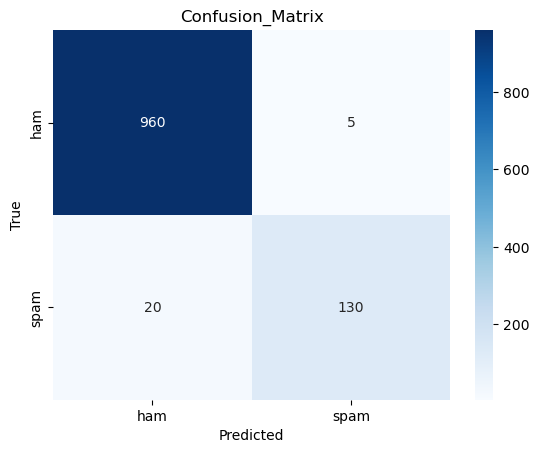

In [53]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion_Matrix')
plt.show()

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.9775784753363229
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

